## **0.Importación de librerias**

In [182]:
import numpy as np
import pandas as pd

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport
import math

%matplotlib inline

## **1.Limpieza y preparación de datos**

> Bloque con sangría



### **1.1 Importación de la base**




In [183]:
base = pd.read_csv('Data_Taller_2.csv',sep=";",decimal=",")

In [184]:
base.shape

(731, 12)

In [185]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   Date        731 non-null    object 
 2   Season      731 non-null    object 
 3   Holiday     731 non-null    object 
 4   Weather     731 non-null    object 
 5   Temp        727 non-null    float64
 6   Feel_Temp   731 non-null    float64
 7   Hum         731 non-null    float64
 8   Wind        731 non-null    float64
 9   Casual      731 non-null    int64  
 10  Registered  731 non-null    int64  
 11  cnt         731 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.7+ KB


In [186]:
base.head()

,instant,Date,Season,Holiday,Weather,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt
0,1,1/01/2020,Springer,No,Mist + Cloudy,8.175849,9.090375,0.805833,10.749882,331,654,985
1,2,2/01/2020,Springer,No,Mist + Cloudy,9.083466,8.625733,0.696087,-16.652113,131,670,801
2,3,3/01/2020,Springer,No,Few clouds,1.229108,0.902035,0.437273,16.636703,120,1229,1349
3,4,4/01/2020,Springer,No,Few clouds,1.400000,1.969734,0.590435,10.739832,108,1454,1562
4,5,5/01/2020,Springer,No,Partly cloudy,2.666979,2.775690,0.436957,12.522300,82,1518,1600


In [187]:
base.describe()

,instant,Temp,Feel_Temp,Hum,Wind,Casual,Registered,cnt
count,731.000000,727.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,15.271063,14.294637,0.682614,12.668792,848.176471,3656.172367,4504.348837
std,211.165812,8.595965,7.659175,0.750679,5.417463,686.622488,1560.256377,1937.211452
min,1.000000,-5.220871,-4.283729,0.000000,-16.652113,2.000000,20.000000,22.000000
25%,183.500000,7.842925,7.878597,0.522291,9.000746,315.500000,2497.000000,3152.000000
50%,366.000000,15.421651,14.876451,0.629167,12.124789,713.000000,3662.000000,4548.000000
75%,548.500000,22.785000,20.604294,0.732708,15.624802,1096.000000,4776.500000,5956.000000
max,731.000000,32.498349,31.522112,10.867083,34.000021,3410.000000,6946.000000,8714.000000


### **1.2 Limpieza de datos**


Identificación de duplicados

In [188]:
base.drop_duplicates().shape[0]-base.shape[0]

0

In [189]:
base.shape

(731, 12)

No existen duplicados en la base.

Conversión a fecha

In [190]:
base['Date'] = np.where(base["Date"].str.split('/', 1).str[0].apply(float)<10,'0'+base["Date"],base['Date'])


### **1.3 Indentificación de outliers**

En los casos donde existan atípicos se reemplzará esta observación por la mediana de la misma.

In [191]:
base['cnt'] = base['cnt'].apply(float)
base['Wind'] = np.where(base['Wind'] > base['Wind'].mean()+base['Wind'].std()*3,base['Wind'].median(),base['Wind'])
base['Temp'] = np.where(base['Temp'] > base['Temp'].mean()+base['Temp'].std()*3,base['Temp'].median(),base['Temp'])
base['Hum'] = np.where(base['Hum'] > base['Hum'].mean()+base['Hum'].std()*3,base['Hum'].median(),base['Hum'])
base['Feel_Temp'] = np.where(base['Feel_Temp'] > base['Feel_Temp'].mean()+base['Feel_Temp'].std()*3,base['Feel_Temp'].median(),base['Wind'])
base['cnt'] = np.where(base['cnt'] > base['cnt'].mean()+base['cnt'].std()*3,base['cnt'].median(),base['cnt'])

### 1.4 Identificación de valores nulos

In [192]:
base.isna().sum()

instant       0
Date          0
Season        0
Holiday       0
Weather       0
Temp          4
Feel_Temp     0
Hum           0
Wind          0
Casual        0
Registered    0
cnt           0
dtype: int64

Estos valores se inputan por el promedio de la temperatura.

In [193]:
base['Temp'].fillna(base['Temp'].mean(), inplace=True)

## **2.Análisis de datos**

### **2.1 Análisis gráfico**

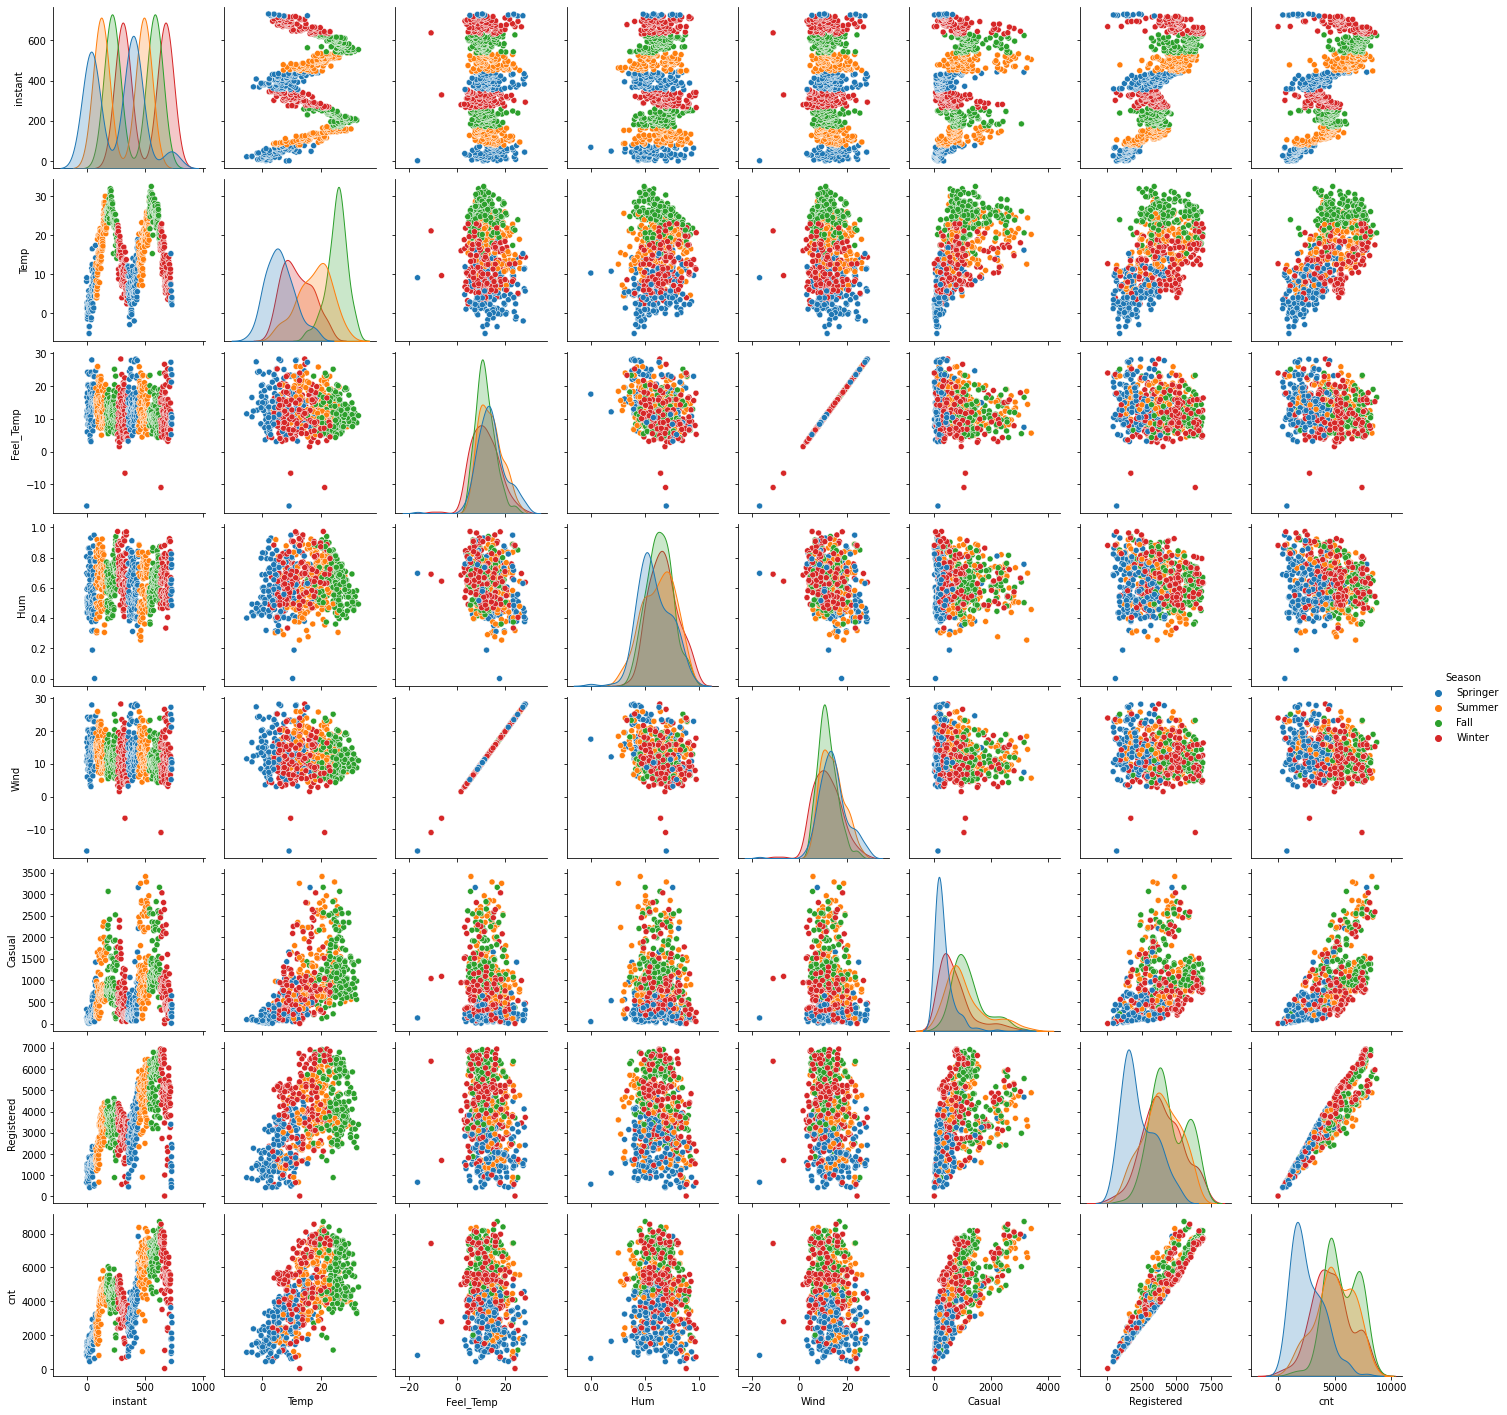

In [194]:
sns.pairplot(data=base,hue='Season')

El anterior gráfico muestra una posible asociación entre la demanda de patinetas y variuables como la temperatura, la humedad y los vientos, lo cual evidencia un aumento de los alquileres en estaciones distintas al invierno.

Text(0.5, 0, 'Demanda')

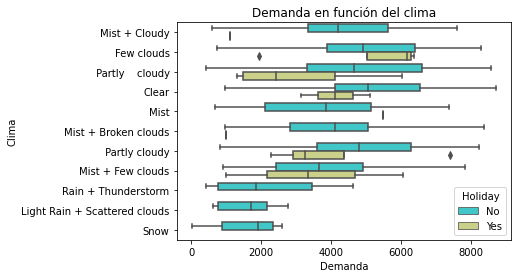

In [195]:
ax = sns.boxplot(x="cnt", y="Weather", data=base, palette='rainbow',hue='Holiday')
ax.set_title("Demanda en función del clima")
ax.set_ylabel("Clima")
ax.set_xlabel("Demanda")

El anterior gráfico muestra, que la demanda se concentra primcipalmente en días ordinarios y climas calidos.

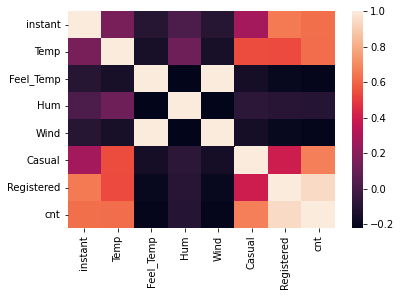

In [196]:
sns.heatmap(base.corr())

El gráfico anterior muestra una sociación fuerte entre el viento y la sensación térmica, por lo cual es inconveniente el tener en cuenta ambas variables en el modelo. 

In [197]:
del base['instant']
del base['Feel_Temp']
del base['Date']

### **2.2 Codificación de las variables**

In [198]:
!pip install category_encoders 
import category_encoders as ce
encoder = ce.OneHotEncoder(use_cat_names=True)
base_encoded = encoder.fit_transform(base)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **2.3 Generación de datos de entrenamiento y prueba**

In [199]:
X = base_encoded[base_encoded.columns.difference(['cnt'])]
Y = base_encoded['cnt'] 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

### **2.4 Escalamiento de datos**

In [200]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **3.Desarrollo de modelos de regresión**

### **3.1 Modelo de regresión lineal simple**

**Implementación del modelo.**

In [201]:
regr = sklearn.linear_model.LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression()

**Resultados del modelo.**

In [208]:
print("SCORE: ", regr.score(X_train, Y_train))
print("MSE: ", mean_squared_error(Y_test, regr.predict(X_test)))
print("RMSE: ", mean_squared_error(Y_test, regr.predict(X_test))**(0.5))

SCORE:  1.0
MSE:  5.199018145489541e-24
RMSE:  2.2801355541917986e-12


### **3.2 Modelo de regresión polinomial - Grado 2**

**Implementación del modelo.**

In [202]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

In [203]:
poly_features = poly.fit_transform(X_train)
poly_features_test = poly.fit_transform(X_test)

In [205]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, Y_train)

LinearRegression()

**Resultados del modelo.**

In [210]:
print("SCORE: ", poly_reg_model.score(poly_features, Y_train))
print("MSE: ", mean_squared_error(Y_test, poly_reg_model.predict(poly_features_test)))
print("RMSE: ", mean_squared_error(Y_test, poly_reg_model.predict(poly_features_test))**(0.5))

SCORE:  1.0
MSE:  20203.062093818742
RMSE:  142.13747603576877


### **3.3 Modelo de regresión Ridge**

**Implementación del modelo.**

In [207]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1,solver="cholesky")
ridge_reg.fit(X_train,Y_train)

Ridge(alpha=0.1, solver='cholesky')

**Resultados del modelo.**

In [211]:
print("SCORE: ", ridge_reg.score(X_train, Y_train))
print("MSE: ", mean_squared_error(Y_test, ridge_reg.predict(X_test)))
print("RMSE: ", mean_squared_error(Y_test, ridge_reg.predict(X_test))**(0.5))

SCORE:  0.9999999499365342
MSE:  0.18240070511630815
RMSE:  0.4270839555828668


## **4.Evaluación de modelos**

Al revisar los modelos anteriormente creados, Considero que el modelo más pertinente es el modelo clásico de regresión lineal simple, Dado que este presenta un muy buen score, es decir; la demanda de patinetas se explica en forma adecuada dadas las variable consideradas en el modelo.

Por otro lado presenta un mejor desempeño que el modelo polinomial y la regresión Ridge las cuales presentan mucha más variabilidad que el modelo de regresión lineal simple.

## **5.Interpretación**

* Para determinar las variables mas importantes del modelo se hará uso del grado de asociación entre la variable respuesta y las variables independientes. Por lo cual, se consideran como variables influyentes en el modelo la temperatura y la estación.

* El escenario ideal para el incremento de usuarios es un día ordinario (no festivo), estaciones cálidas como en verano y climas no lluviosos.

* Información general de los usuarios para poder identificar más plenamente el perfil de los usuarios.